# Pymaceuticals Inc.
---

### Analysis

Based on the analysis of the data provided, below please find the summary:

1) We might want to provide mice on healthy diet and provide excercise to help the decrease the tumor size because the P-value of .84 indicates there is positive correlation between weight of the mice and tumor size.
2) Capomulin seems to be the most effective drug regimen to treat the cancer, as the tumor size in mouse I509 decreased as time went on. 
3) The 4 drugs which were analyzed were Capomulin, Ramicane, Infubinol and Ceftamin. Capomulin and Ramicane seem to be the most effective drugs at decreasing the tumor size. Infubino and Ceftamin were the least effective. 

Based on the results we could either do further studies or advance the two effective drugs to the next stage of trails. 
 

In [97]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
trails_complete = pd.merge(study_results, mouse_metadata, how ="left", on ="Mouse ID")

# Display the data table for preview
trails_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [98]:
# Check for total number of mice in the dataset.
number_mice = len(trails_complete["Mouse ID"].unique())
number_mice

249

In [99]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
trails_complete["Mouse ID"].value_counts().head()

g989    13
b128    10
q787    10
s337    10
q511    10
Name: Mouse ID, dtype: int64

In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid = trails_complete.loc[(trails_complete["Mouse ID"] == "g989")] 
duplicate_mouseid

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_trails_complete = trails_complete.loc[(trails_complete['Mouse ID'] != 'g989')] 
clean_trails_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [102]:
# Checking the number of mice in the clean DataFrame.
Clean_trails_number_mice = len(clean_trails_complete["Mouse ID"].unique())
Clean_trails_number_mice

248

## Summary Statistics

In [103]:
# let's find first the drugs name using unique
clean_trails_complete["Drug Regimen"].unique()



array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_group = clean_trails_complete.groupby("Drug Regimen")
#drug_group.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume.

#Calculate the Mean Tumor
tumor_mean = drug_group["Tumor Volume (mm3)"].mean()

#Calculate the Median Tumor
tumor_median = drug_group["Tumor Volume (mm3)"].median()

#calculate the variance
tumor_variance = drug_group["Tumor Volume (mm3)"].var()

#Calculate the Standard Deviation
tumor_stddev = drug_group["Tumor Volume (mm3)"].std()

#Calculate the SEM
tumor_sem =drug_group["Tumor Volume (mm3)"].sem()

# dataframe to summarize the calculations
summary_regimen =pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median,
                               "Tumor Volume Variance": tumor_variance,"Tumor Volume Std.Dev.": tumor_stddev,
                               "Tumor Volume std Err.": tumor_sem,
                              })

summary_regimen


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume std Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_group = clean_trails_complete.groupby(clean_trails_complete["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", "median","var", "std", "sem"])

#create a dataframe for regimen

summary_stats_group =pd.DataFrame({"mean": tumor_mean, "median": tumor_median,
                               "var": tumor_variance,"std": tumor_stddev,
                               "sem": tumor_sem,
                              })
#adding tumor volume (mm3 as header)
summary_stats_group.columns=pd.MultiIndex.from_product([['Tumore Volume (mm3)'],summary_stats_group.columns])
summary_stats_group


Tumore Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

<IPython.core.display.Javascript object>


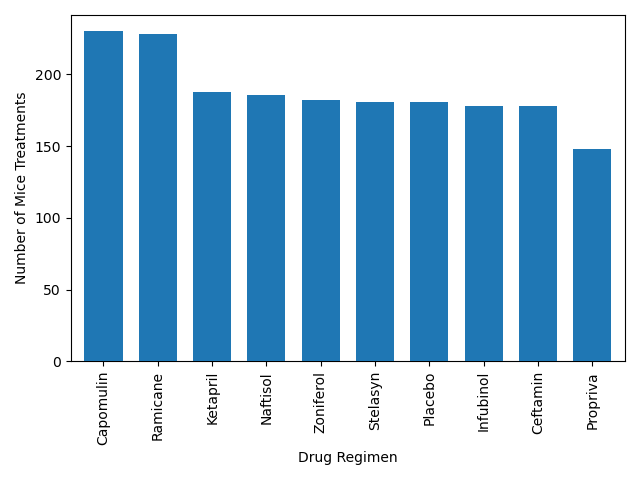

In [106]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#filte the dataframe down only to those columns to chart
bar_plot = clean_trails_complete["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)

# Set a title for the chart
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Treatments")
plt.show()
plt.tight_layout()

## Bar and Pie Charts

<IPython.core.display.Javascript object>


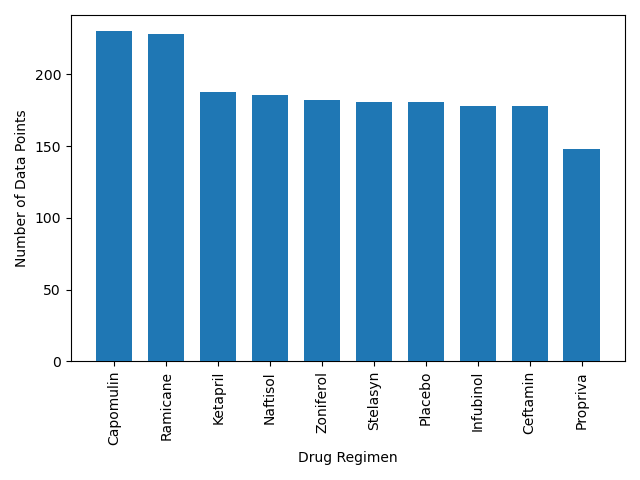

In [107]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Calculate the amount of data points for each drug regimen
counts = clean_trails_complete['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Display resulting plot
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


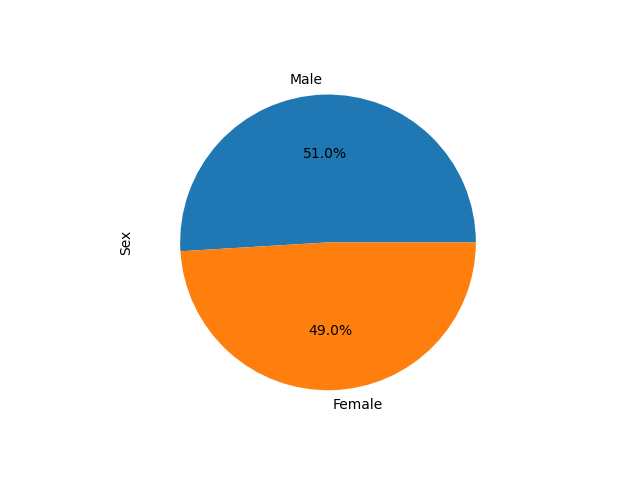

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
Female_data = clean_trails_complete['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = Female_data.plot.pie(autopct="%1.1f%%", startangle=360)

# pie chart show
plt.show()

<IPython.core.display.Javascript object>


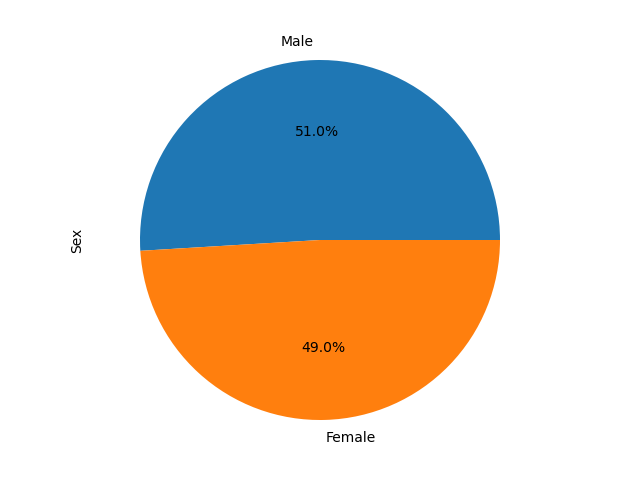

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
Female_data = clean_trails_complete['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = Female_data.plot.pie(autopct="%1.1f%%", startangle=360)

# Display resulting plot
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#created a groupby of Mouse ID and looked at max timepoint of each Mouse ID
last_tm = clean_trails_complete.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm) # turned it into a dataframe for merging

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging "on" Mouse ID and Timepoint, "how" on RIGHT so that it only records the MAX timepoints
last_df = pd.merge(clean_trails_complete, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])   
        
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

# Determine outliers using upper and lower bounds
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

Lower Quartile  Upper Quartile        IQR     Median  Upper Bound  \
Drug                                                                           
Capomulin       32.377357       40.159220   7.781863  38.125164    51.832015   
Ceftamin        48.722078       64.299830  15.577752  59.851956    87.666458   
Infubinol       54.048608       65.525743  11.477135  60.165180    82.741446   
Ramicane        31.560470       40.659006   9.098537  36.561652    54.306811   

           Lower Bound        Max        Min  
Drug                                          
Capomulin    20.704562  47.685963  23.343598  
Ceftamin     25.355450  68.923185  45.000000  
Infubinol    36.832905  72.226731  36.321346  
Ramicane     17.912664  45.220869  22.050126

In [112]:
# see if there is an outlier
cap_m = drug_df['Capomulin'] > 47.69
drug_df["Capomulin"]

print(f"There is an outlier for the drug Infubinol as a mouse has a tumor size of 36.32.")

There is an outlier for the drug Infubinol as a mouse has a tumor size of 36.32.


<IPython.core.display.Javascript object>


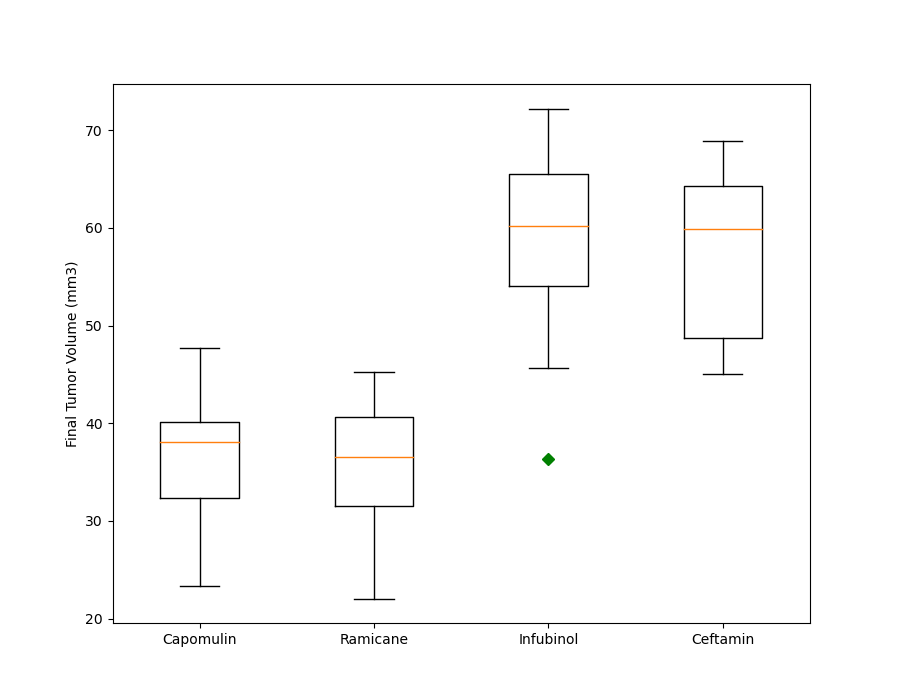

In [113]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Created a list to use for the boxplot. Each one list is a list of each drug tumor data. 
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel('Final Tumor Volume (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


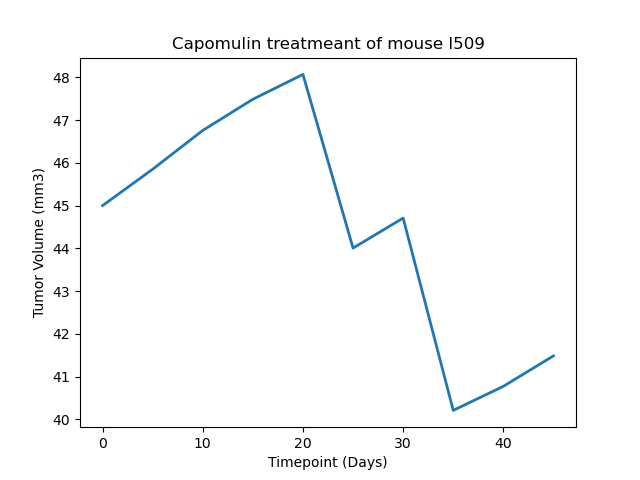

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df = clean_trails_complete.loc[clean_trails_complete["Mouse ID"] == "l509",:]
line_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = line_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

<IPython.core.display.Javascript object>


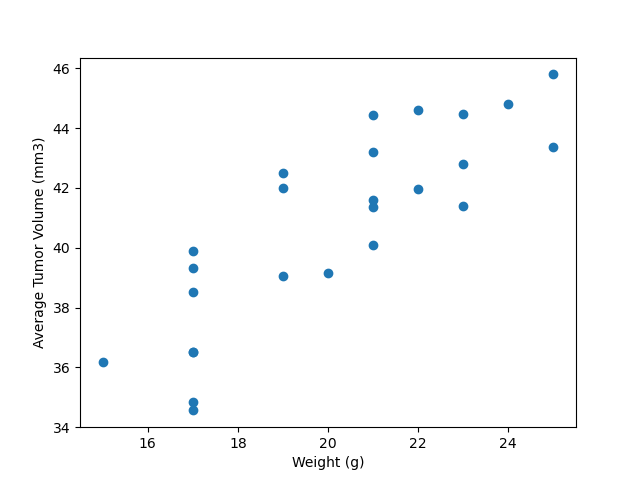

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_df = clean_trails_complete.loc[clean_trails_complete["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
capavg = cap_df.groupby(['Mouse ID']).mean()
# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
# using the persons formula st.pearsonr() and used the capavg dataframe to pull the p value
# this is a linear value that says there's a high degree of correlation if the number is close to 1; 
# no correlation if close to 0; or a negative correlation if close to -1.

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [120]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [122]:
# defined slope of regression line using the linregress results
# defined the y-intercept using the linregress results
slope = 0.9544396890241045
intercept = 21.552160532685015

<IPython.core.display.Javascript object>


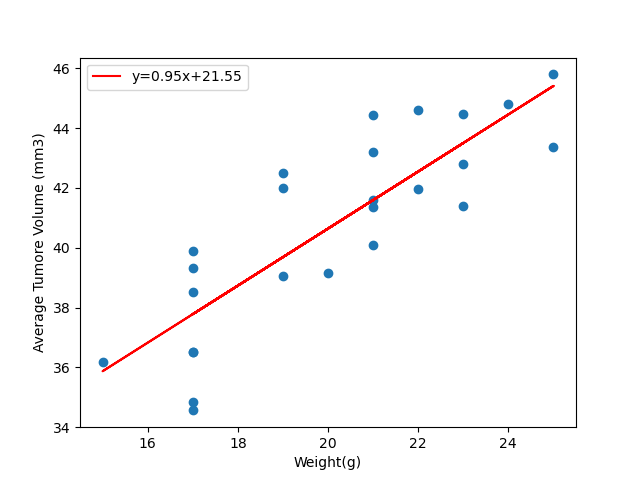

In [123]:
# ploting the regression line

# calculate the the linear line plot list of values
line = slope*(capavg['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
# included legend with the redline slope formula using plt.legend()
plt.legend()
plt.savefig('linearregression')
plt.show()